In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

num_classes=10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [13]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 [==============================] - 84s 178ms/step - loss: 0.8764 - accuracy: 0.7531 - val_loss: 0.6596 - val_accuracy: 0.8548
Epoch 2/10
469/469 [==============================] - 86s 183ms/step - loss: 0.8033 - accuracy: 0.7654 - val_loss: 0.5965 - val_accuracy: 0.8634
Epoch 3/10
469/469 [==============================] - 86s 184ms/step - loss: 0.7484 - accuracy: 0.7783 - val_loss: 0.5497 - val_accuracy: 0.8684
Epoch 4/10
469/469 [==============================] - 92s 196ms/step - loss: 0.7047 - accuracy: 0.7889 - val_loss: 0.5142 - val_accuracy: 0.8726
Epoch 5/10
469/469 [==============================] - 93s 199ms/step - loss: 0.6711 - accuracy: 0.7982 - val_loss: 0.4860 - val_accuracy: 0.8764
Epoch 6/10
469/469 [==============================] - 91s 194ms/step - loss: 0.6437 - accuracy: 0.8069 - val_loss: 0.4629 - val_accuracy: 0.8791
Epoch 7/10
469/469 [==============================] - 88s 187ms/step - loss: 0.6176 - accuracy: 0.8128 - val_loss: 0.4440 - val_ac

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4010314643383026
Test accuracy: 0.8924000263214111


Sample Training Images are:



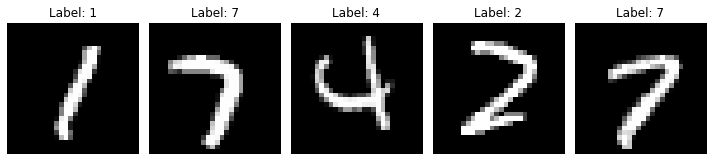

Sample Testing Images are:



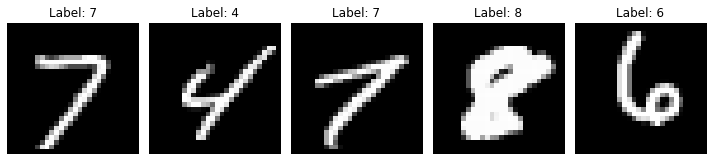

In [24]:
#one-hot encode the labels
#train_labels=tf.keras.utils.to_categorical(train_labels)
#test_labels=tf.keras.utils.to_categorical(test_labels)

# Select a few random samples from the training and testing sets
num_samples = 5  # Number of samples to display
random_train_indices = np.random.randint(0, len(x_train), num_samples)
random_test_indices = np.random.randint(0, len(x_test), num_samples)

# Display the sample training images
print("Sample Training Images are:\n")
plt.figure(figsize=(10, 4))
for i, index in enumerate(random_train_indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Display the sample testing images
print("Sample Testing Images are:\n")
plt.figure(figsize=(10, 4))
for i, index in enumerate(random_test_indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Label: {y_test[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
